In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
original_image_bgr = cv2.imread('original.jpg')
test_image_bgr = cv2.imread('test_2.jpg')

In [4]:
original_image_rgb = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2RGB)
test_image_rgb = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)

In [5]:
original_image_gray = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)
test_image_gray = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2GRAY)

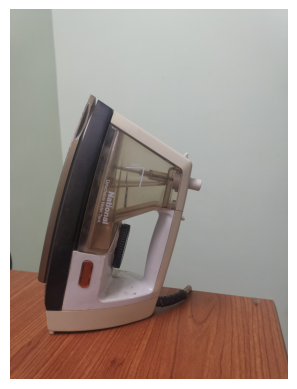

In [6]:
plt.imshow(original_image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

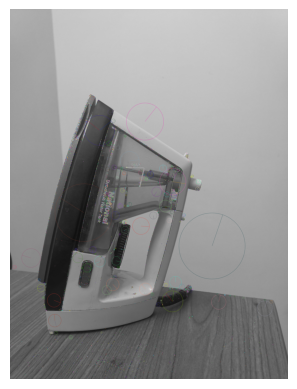

In [7]:
sift = cv2.SIFT_create()
kp, kpdesc = sift.detectAndCompute(original_image_gray, mask=None)
original_kp = None
img_kp = cv2.drawKeypoints(original_image_gray, kp, original_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_kp);
plt.axis('off');

(-0.5, 2975.5, 3967.5, -0.5)

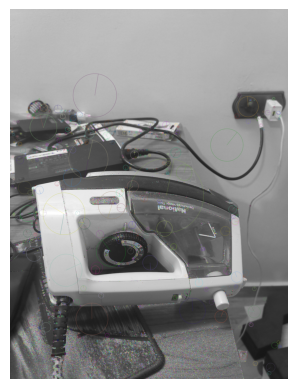

In [8]:
kp2, kp2desc = sift.detectAndCompute(test_image_gray, mask=None)
test_kp = None
test_kp = cv2.drawKeypoints(test_image_gray, kp2, test_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(test_kp)
plt.axis('off')

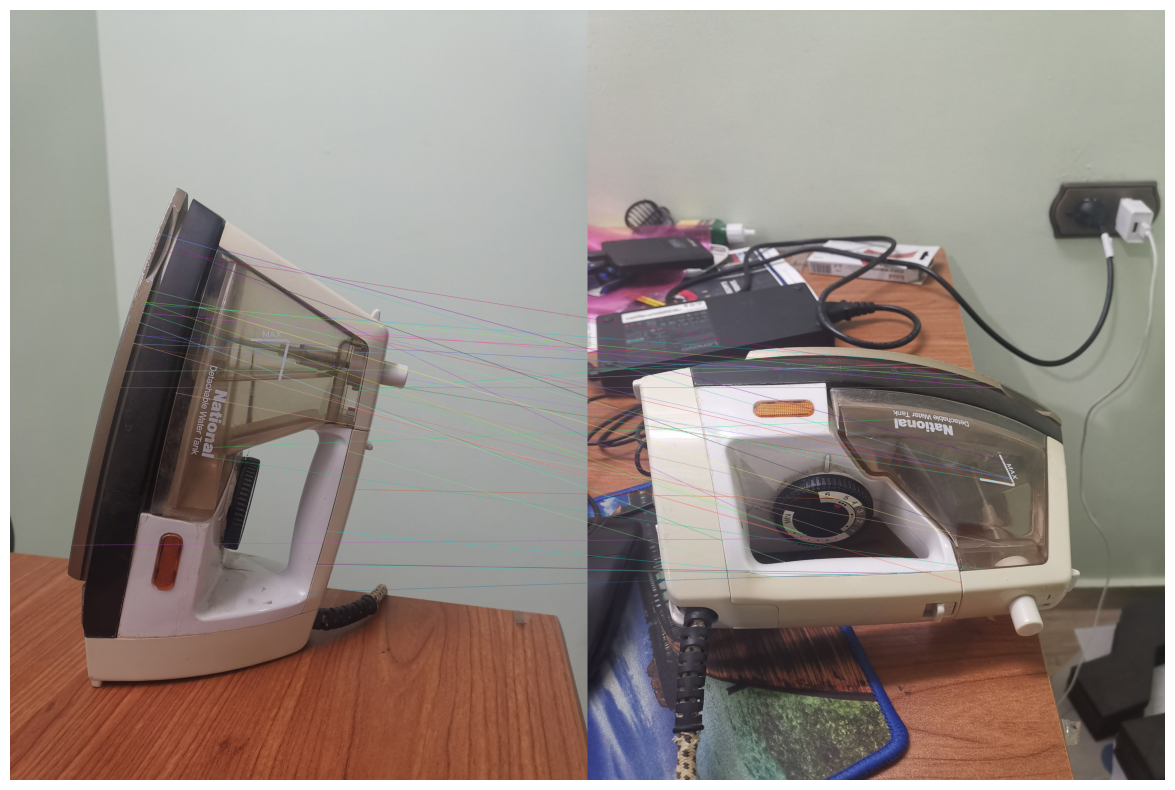

In [9]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(kpdesc, kp2desc)
matches = sorted(matches, key = lambda x:x.distance)
img_matches = None
img_matches = cv2.drawMatches(original_image_rgb, kp, test_image_rgb, kp2, matches[:42], img_matches,
                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10));
plt.imshow(img_matches);
plt.axis('off');

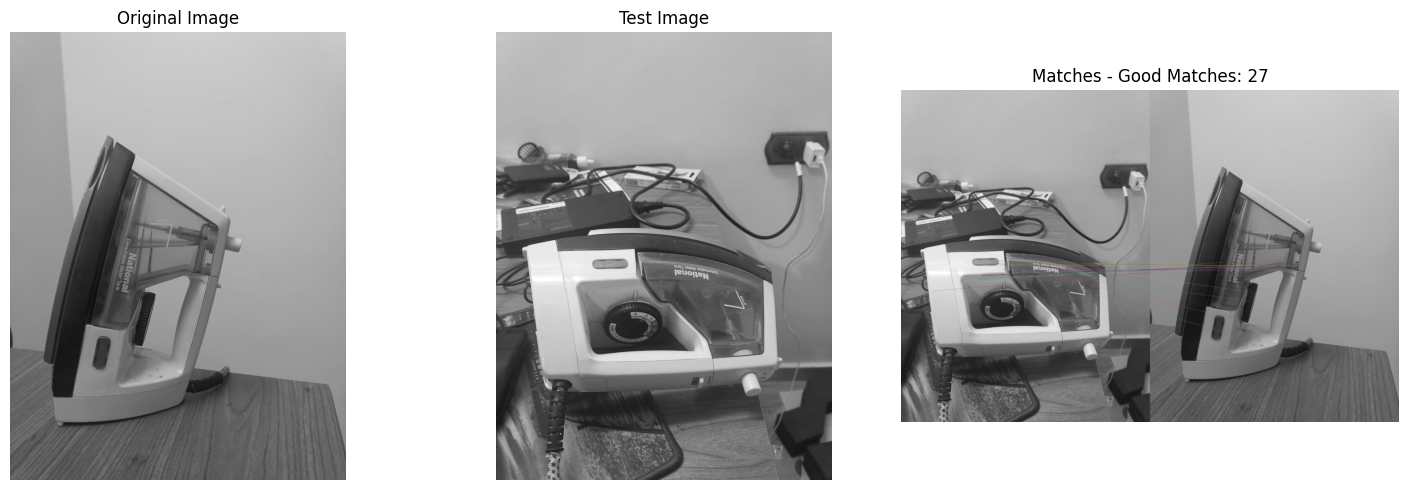

27

In [12]:

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(original_image_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(test_image_gray, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

result_image = cv2.drawMatches(test_image_gray, keypoints1, original_image_gray, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(original_image_gray, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(test_image_gray, cmap='gray')
ax[1].set_title('Test Image')
ax[1].axis('off')
ax[2].imshow(result_image)
ax[2].set_title(f'Matches - Good Matches: {len(good_matches)}')
ax[2].axis('off')
plt.tight_layout()
plt.show()

len(good_matches)
